# S08T01 - DATA PREP & FEATURE ENGINEERING
Aprèn a gestionar paràmetres amb Python.

<font color='blue'>For this exercise we'll explore data about <b>cross-fit</b> athletes during the year 2019.<br>We'll start by loading the dataset and importing the modules needed:
    
### - Exploring the raw dataset and variables

In [700]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

xfit = pd.read_csv(r'Xfit.csv')
print("Shape: ", xfit.shape, "\n")
print(xfit.info(), "\n")
xfit.sample(1, random_state=42)

Shape:  (394, 18) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   affiliateid          357 non-null    float64
 2   countryoforiginname  394 non-null    object 
 3   weight               394 non-null    float64
 4   affiliatename        357 non-null    object 
 5   status               394 non-null    object 
 6   bibid                394 non-null    object 
 7   profilepics3key      394 non-null    object 
 8   competitorid         394 non-null    int64  
 9   firstname            394 non-null    object 
 10  gender               394 non-null    object 
 11  age                  394 non-null    int64  
 12  lastname             394 non-null    object 
 13  countryoforigincode  393 non-null    object 
 14  competitorname       394 non-null    object 
 15  overallrank         

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
78,1.83,NaN,Romania,88.0,NaN,CUT,162,dcd71-P213806_3-184.jpg,213806,Severin,M,31,Irimia,RO,Severin Irimia,79,-4.0,Men


<font color='blue'>At first sight, that dataset contains 18 parameters including 394 entries of different athletes. We can also ascertain that there's plenty of NaN values; and that the dataset is a combination of numeric and categorical atributes. Let's start by cleaning the dataset of NaNs and deleting some deceiving columns that are not adding value ("profilepics.3key", "competitorid", "affiliateid", etc.).


### - Treat missing values and outliers

In [701]:
#columns we wanna drop
cols = ["profilepics3key", "competitorid", "affiliateid","affiliatename","countryoforigincode", 
        "bibid","lastname","competitorname", "firstname","overallrank","gender"]

#dropping columns
xfit.drop(cols, axis=1, inplace=True)

#renaming columns
xfit.rename(columns={"countryoforiginname":"continent","division":"gender"}, inplace=True)
xfit["gender"] = xfit["gender"].apply(lambda x: x.split()[0])

#droping NaN values
xfit.dropna(inplace=True)

#dictionary with countries per continent
continents = {"Africa":["South Africa","Egypt","Nigeria",'Tunisia', 'Zimbabwe',"Kenya","Angola","Morocco",
                        'Ghana','Algeria','Senegal','Botswana','Mozambique','Namibia', "Mauritius"],
              "South America":['Brazil','Argentina', 'Colombia',"Guatemala",
                         "Venezuela",'Chile',"Paraguay","Belize",'Dominican Republic', 'Panama',"Honduras",
                         "Uruguay","Guyana","Ecuador","Jamaica","Trinidad and Tobago","Bahamas",'El Salvador', 
                         'Peru','Costa Rica', 'Barbados',"Saint Lucia",'Nicaragua','Bolivia',"Suriname"],
              "North America":["United States","Canada","Mexico"],
              "Asia":["China",'United Arab Emirates','Japan','Jordan','Palestinian Territory',"Kuwait",
                      "Philippines","Iran",'Bahrain',"Malaysia",'Korea, Republic of','Lebanon', 'Saudi Arabia', 
                      'Indonesia','Israel','Qatar','Iraq','Cambodia', 'Afghanistan','Pakistan', 'India', 
                      'Singapore','Sri Lanka','Viet Nam', 'Oman','Syrian Arab Republic',"Brunei Darussalam"],
              "Europe":["Iceland","Switzerland","Sweden","Germany","United Kingdom","Denmark","France","Ireland",
                        "Latvia","Finland","Norway",'Poland', 'Lithuania','Slovenia', 'Hungary',"Belgium",
                        'Russian Federation', 'Spain','Slovakia', 'Greece', 'Turkey', 'Luxembourg', 'Croatia',
                        "Netherlands",'Austria','Ukraine', 'Bosnia and Herzegovina',"Portugal",'Estonia', 
                        'Bulgaria',"Czech Republic","Belarus",'Kosovo','Malta','Cyprus','Italy','Andorra', "Serbia"],
              "Oceania":["Australia","New Zealand","Tonga",'Papua New Guinea',"Samoa"]}

#function to change country by continent
def country_cont(country, continents):
    for key, values in continents.items():
        for v in values:
            if v==country:
                return key

#changing the column with countries to continents
xfit["continent"] = xfit["continent"].apply(lambda x: country_cont(x, continents))

xfit_orig = xfit.copy()               #saving a copy of the original dataset for Exercise 3
xfit.sample(1, random_state=42)

,height,continent,weight,status,age,overallscore,gender
9,1.8,North America,86.2,ACT,30,485.0,Men


BEFORE CLEANING OUTLIERS


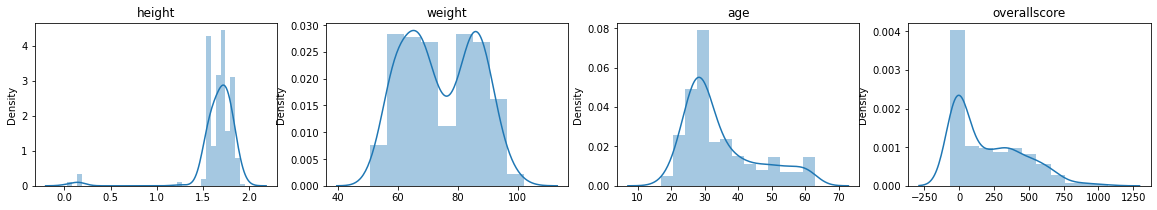

AFTER CLEANING OUTLIERS


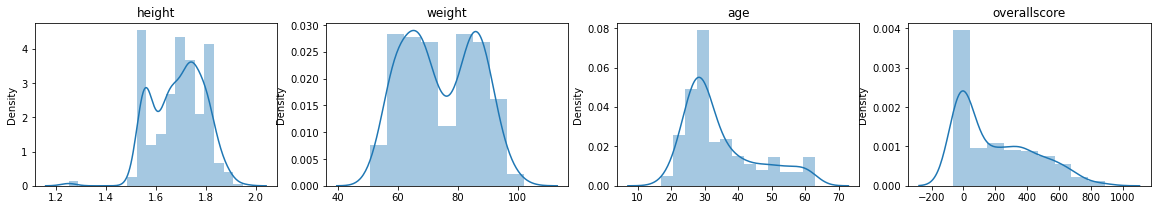

In [702]:
import warnings
warnings.filterwarnings('ignore')

#numerical attributes
ats=["height","weight","age","overallscore"]

#function to plot the numerical attributes
def out_plots(ats,xfit):
    plt.figure(figsize=(20, 3))
    
    c=len(ats)
    for i in range(c):
        sp="1"+str(c)+str(i)
        plt.subplot(sp)
        sns.distplot(x=xfit[ats[i-1]],kde=True)
        plt.title(ats[i-1])
    plt.show()

print("BEFORE CLEANING OUTLIERS")
#plotting numerical attributes before checking outliers
out_plots(ats,xfit)

#function to detect outliers
def detect_outliers(data, outliers):
        threshold=3
        mean=np.mean(data)
        std=np.std(data)

        for i in data:
            z_score=(i-mean)/std
            if np.abs(z_score)>threshold:
                outliers.append(mean)
            else:
                outliers.append(i)
        return outliers

#function to clean outliers (by overriding the mean of the column)
def clean_outliers(xfit,ats):
    outliers=[]
    
    detect_outliers(xfit[ats],outliers)
    xfit[ats] = outliers
    return xfit

#iterate thru all the numerical attributes
for a in range(len(ats)):
    clean_outliers(xfit,ats[a])

print("AFTER CLEANING OUTLIERS")
#plotting the numerical attributes after the outlier cleaning
out_plots(ats,xfit)

<font color='blue'>Apparently the only parameter with extreme outliers was the "height". <br>Let's take a quick look at the categorical parameters:

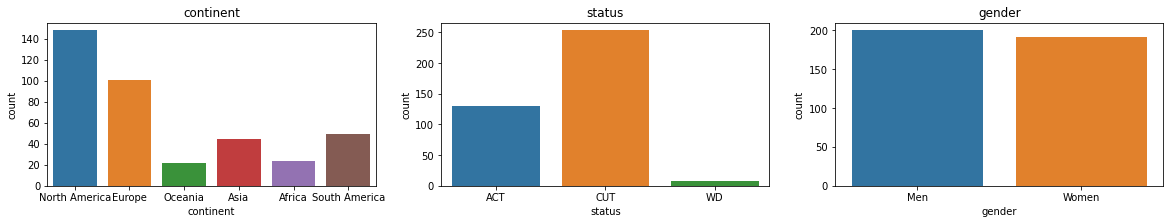

In [703]:
#list of categorical parameters
categorical = ["continent","status","gender"]

def cat_plots(cat):
    plt.figure(figsize=(20, 3))
    c=len(cat)
    for i in range(c):
        sp="1"+str(c)+str(i)
        plt.subplot(sp)
        sns.countplot(data=xfit, x=cat[i-1])
        plt.title(cat[i-1])
    plt.show()

#plotting categorical attributes before checking outliers
cat_plots(categorical)

 <font color='blue'> Now that we got rid of outliers and filled in missing values with the means, we can move to feature engineering:
***
# - Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i <u>normalitza els atributs categòrics en dummy</u>. <u>Estandaritza els atributs numèrics amb StandardScaler.</u><br><br>

### - Feature engineering > Scaling > Normalization
<br>
We'll use normalization to create the 'dummy' version of each categorical parameter. This will help optimizing the model we apply later. 

In [704]:
display(xfit[categorical].sample(5, random_state=42))

#dummy creation
dummy = pd.get_dummies(xfit[categorical])
display(dummy.sample(5, random_state=42))

#concatenate to the main dataset
xfit = pd.concat([xfit,dummy], axis=1)
xfit.sample(5, random_state=42)

,continent,status,gender
9,North America,ACT,Men
42,Europe,CUT,Men
33,Europe,CUT,Men
315,North America,ACT,Men
373,North America,WD,Women


,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,status_ACT,status_CUT,status_WD,gender_Men,gender_Women
9,0,0,0,1,0,0,1,0,0,1,0
42,0,0,1,0,0,0,0,1,0,1,0
33,0,0,1,0,0,0,0,1,0,1,0
315,0,0,0,1,0,0,1,0,0,1,0
373,0,0,0,1,0,0,0,0,1,0,1


,height,continent,weight,status,age,overallscore,gender,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,status_ACT,status_CUT,status_WD,gender_Men,gender_Women
9,1.80,North America,86.2,ACT,30,485.0,Men,0,0,0,1,0,0,1,0,0,1,0
42,1.80,Europe,87.1,CUT,26,108.0,Men,0,0,1,0,0,0,0,1,0,1,0
33,1.56,Europe,90.7,CUT,26,191.0,Men,0,0,1,0,0,0,0,1,0,1,0
315,1.74,North America,78.5,ACT,45,740.0,Men,0,0,0,1,0,0,1,0,0,1,0
373,1.58,North America,59.0,WD,58,240.0,Women,0,0,0,1,0,0,0,0,1,0,1


<font color='blue'>Now we have the dataset with the <b>categorical variables in dummy</b> version. Now let's apply <b>standarization to the numeric variables</b>.
    
### - Feature engineering > Scaling > Standarization
<br>    
We'll assume the distributions of the numerical parameters are approximately normal, as we could see in the plots implemented earlier.

-1.0335580075794296e-15 0.9999999999999999


,height,weight,age,overallscore
9,1.073931,0.980045,-0.417127,1.207610
42,1.073931,1.054026,-0.783430,-0.382367
33,-1.281710,1.349950,-0.783430,-0.032319
315,0.485021,0.347095,0.956511,2.283060
373,-1.085407,-1.255829,2.146997,0.174336


BEFORE STANDARIZATION


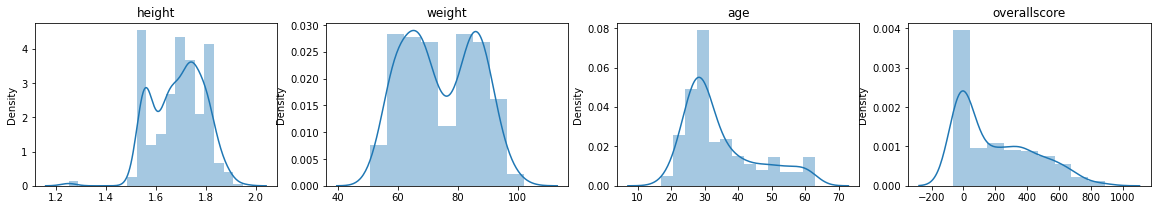

AFTER STANDARIZATION


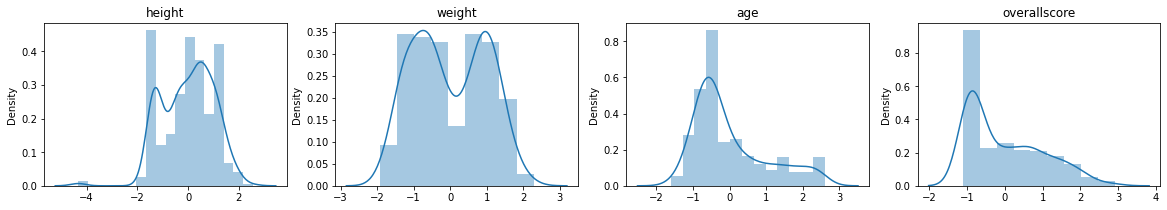

In [705]:
from sklearn.preprocessing import StandardScaler

numerical = ["height","weight", "age", "overallscore"]

#initialize the scaler
ss = StandardScaler()

#Fit the data using the scaler (scale the data)
Xstd = ss.fit_transform(xfit[numerical].values)
print(Xstd.mean(), Xstd.std())

#update the dataframe with the standarized data
xfit_std = xfit.copy()
xfit_std[numerical] = Xstd
display(xfit_std[numerical].sample(5, random_state=42))

#visualizing the dataset before and after the standarization
print("BEFORE STANDARIZATION")
out_plots(numerical,xfit)
print("AFTER STANDARIZATION")
out_plots(numerical,xfit_std)

<font color='blue'>As we can see the dataset has been remarkably optimized thanks to the standarization, and yet the proportions and data distribution of each parameter has remained the same.
***
# - Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'<b><u>anàlisi de components principals.</u></b><br><br>

### - Feature engineering > Dimensionality reduction > PCA
Let's recheck how is our dataset after all the modifications we did up to now:

In [706]:
xfit_std.drop(columns=["continent","gender","status"], axis=1, inplace=True)
print(xfit_std.shape)
xfit_std.sample(5, random_state=42)

(391, 15)


,height,weight,age,overallscore,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,status_ACT,status_CUT,status_WD,gender_Men,gender_Women
9,1.073931,0.980045,-0.417127,1.207610,0,0,0,1,0,0,1,0,0,1,0
42,1.073931,1.054026,-0.783430,-0.382367,0,0,1,0,0,0,0,1,0,1,0
33,-1.281710,1.349950,-0.783430,-0.032319,0,0,1,0,0,0,0,1,0,1,0
315,0.485021,0.347095,0.956511,2.283060,0,0,0,1,0,0,1,0,0,1,0
373,-1.085407,-1.255829,2.146997,0.174336,0,0,0,1,0,0,0,0,1,0,1


<font color='blue'>Looks like the definitive dataset is 15-dimensional. Before we apply the PCA to reduce it, we need to decide how many dimensions we actually want to reduce it to (i.e. the number of parameters). That's always related to the amount of variance we are willing to add to the model. Let's asume we want at least 95% of the variance of the data. What's the minimum number of parameters we should keep? Let's see the following plot to get a rough idea:

Text(5.43, 0.35, 'V')

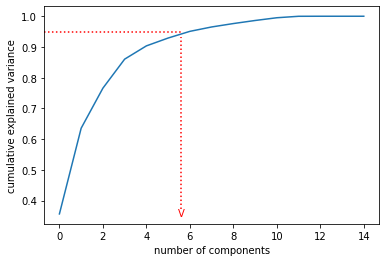

In [707]:
from sklearn.decomposition import PCA
pca = PCA().fit(xfit_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.95, 0 ,0.41, ls=':', c='red')    # minimum variance
plt.axvline(5.6, 0.070 ,0.86, ls=':', c='red')    # minimum variance
plt.annotate("V", xy=(5.43,0.35), color='red')

<font color='blue'>We can observe that if we want to keep at least 95% of the variance, after applying PCA we should have close to 6 parameters intact. Let's see if we get the same result after PCA:

In [708]:
pca = PCA(.95)
pca.fit(xfit_std)
print("Number of components: ", pca.n_components_ )
print("Variance ratio: ", pca.explained_variance_ratio_.sum())

Number of components:  7
Variance ratio:  0.9507930101366


<font color='blue'>Effectively, the PCA reduced our dataset dimension from 15 to 7, very close to the 6 we estimated with the plot; while the variance our dataset has is still 95%+!<br>And this is how our dataset looks like after we apply the modifications of dimension reduction:

In [709]:
#applying pca
principalComponents = pca.transform(xfit_std)
xfit_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', "PC3", "PC4", "PC5", "PC6", "PC7"])

xfit_pca.sample(5, random_state=42)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
9,0.298252,-1.959451,-0.157658,1.044822,-0.547192,0.143123,-0.086525
42,-1.634051,-1.091877,-0.190318,0.335977,0.618560,-0.146452,-0.102388
33,-0.908305,-0.332308,1.940125,0.325542,0.791251,-0.230564,0.006278
312,1.988005,-1.859089,-0.085872,0.706723,-0.261717,0.285377,-0.116363
370,2.287560,1.039898,-0.147667,-1.387819,-0.079473,-0.609555,0.000212


Text(0.5, 1.0, 'PCA pairplot')

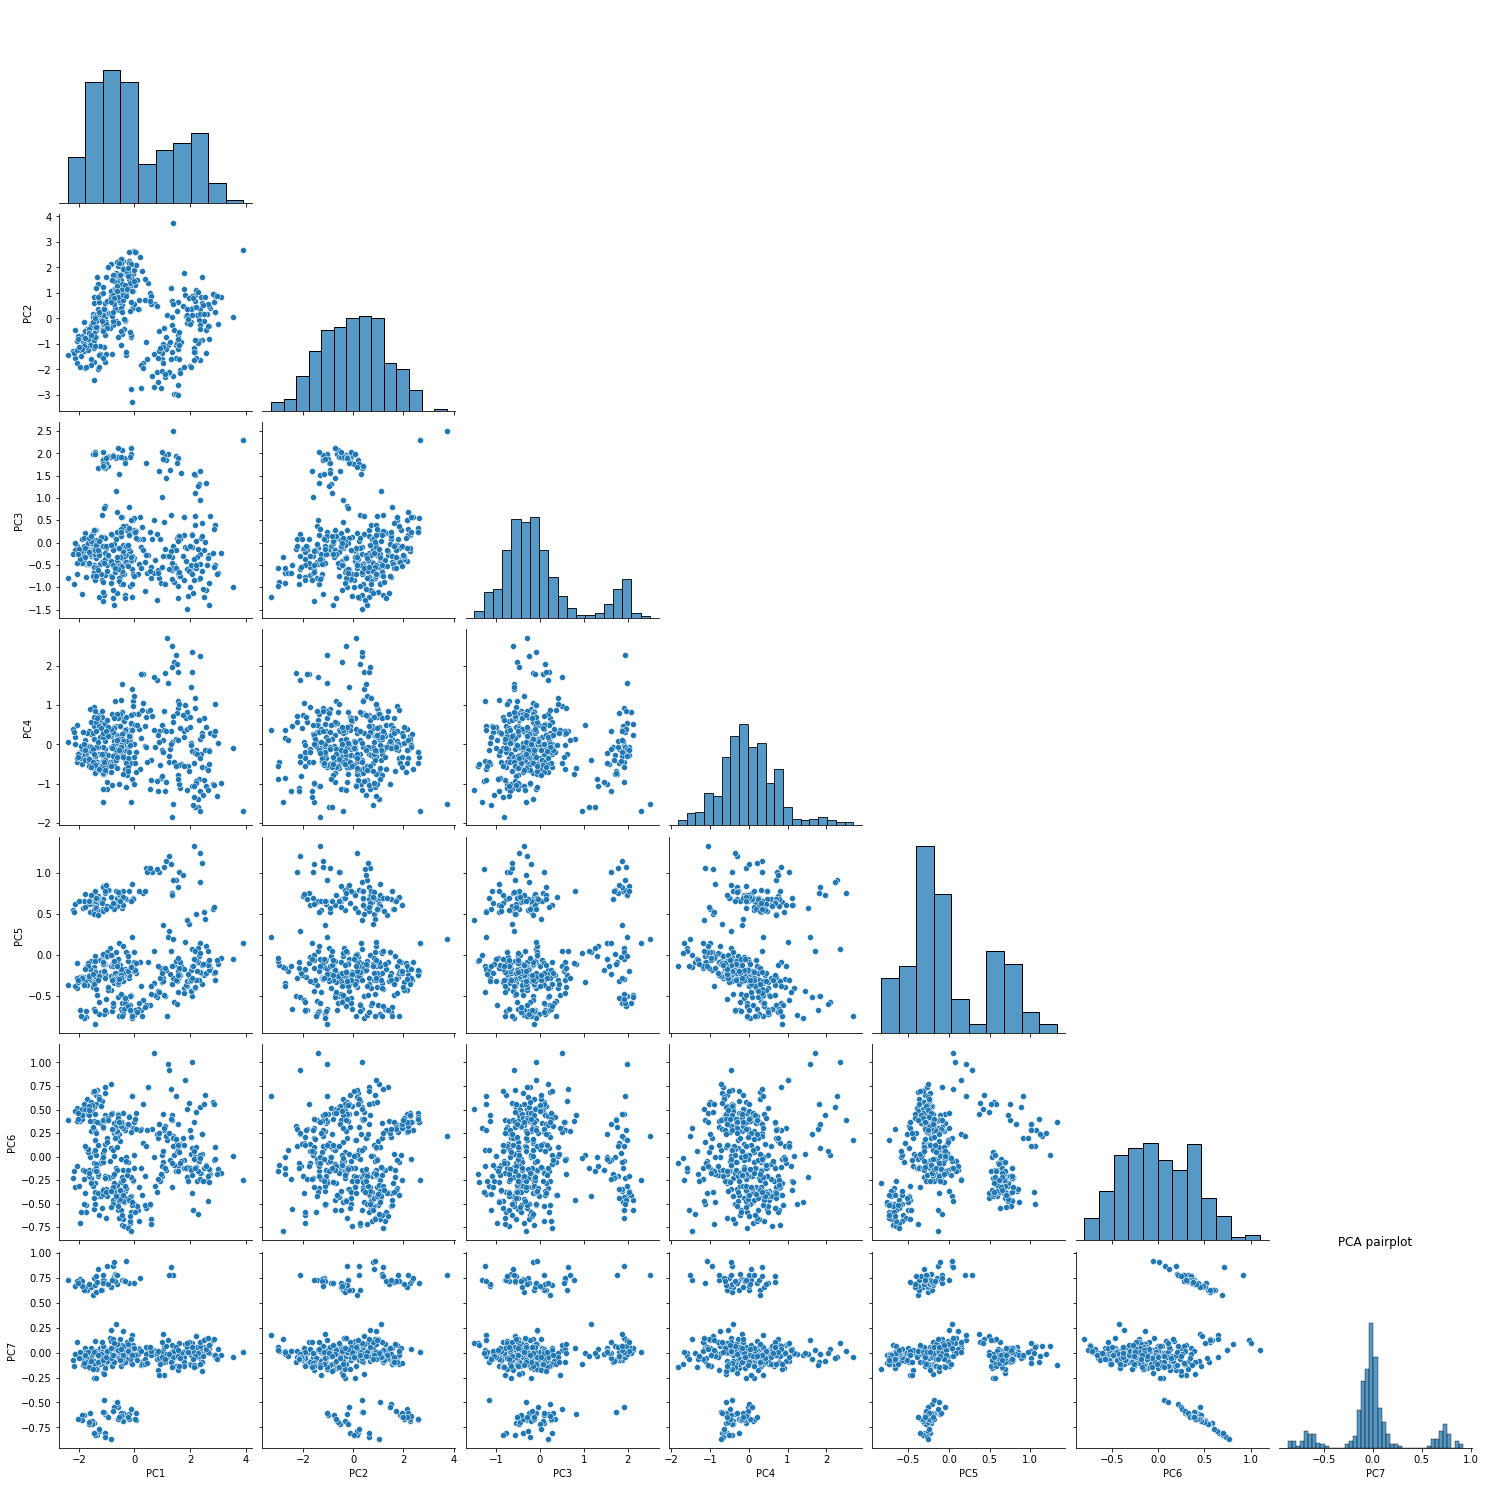

In [710]:
# PCA pair-plot
sns.pairplot(xfit_pca, corner=True, height=3)
plt.title("PCA pairplot")

***
<font color='blue'>
    
# - Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i <b>normalitza</b> les dades tenint en compte els <b>outliers</b>.

As we saw before, the only paramater from the original dataset (before normalization and standarization) that had important outliers was <b>height</b>. We can see that here:   

,height,weight,age,overallscore
9,1.80,86.2,30,485.0
42,1.80,87.1,26,108.0
33,1.56,90.7,26,191.0
315,1.74,78.5,45,740.0
373,1.58,59.0,58,240.0


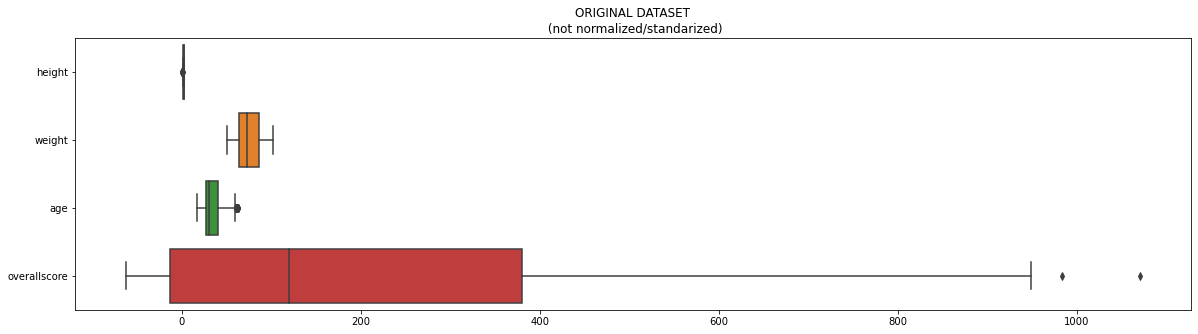

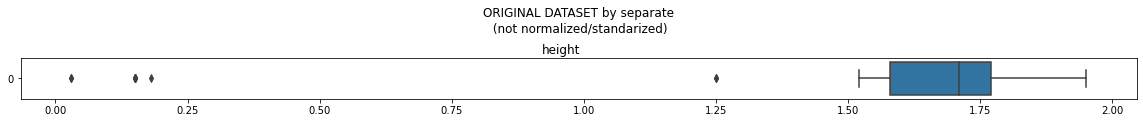

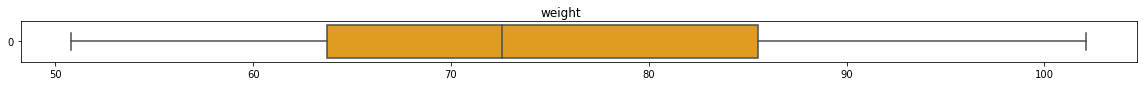

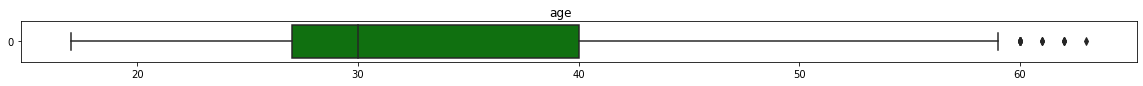

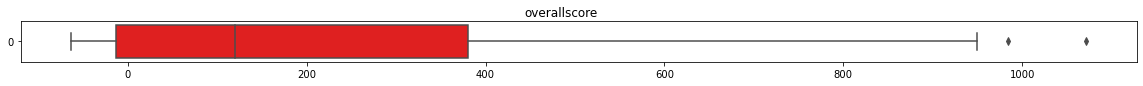

In [711]:
display(xfit_orig[ats].sample(5, random_state=42))

#numerical attributes all together
plt.figure(figsize=(20,5))
plt.title('ORIGINAL DATASET\n (not normalized/standarized)')
sns.boxplot(data=xfit_orig[ats], orient='h');
plt.show()

#setting up boxplots
plt.figure(figsize=(20,0.75))
plt.title('ORIGINAL DATASET by separate\n (not normalized/standarized)', y=1.5);

#attribute height
sns.boxplot(data=xfit_orig["height"], orient='h');
plt.suptitle("height", y=1.15)
plt.show()

#attribute weight
plt.figure(figsize=(20,0.75))
sns.boxplot(data=xfit_orig["weight"], orient='h', color='orange');
plt.suptitle("weight", y=1.15)
plt.show()

#attribute age
plt.figure(figsize=(20,0.75))
sns.boxplot(data=xfit_orig["age"], orient='h', color='g');
plt.suptitle("age", y=1.15)
plt.show()

#attribute overallscore
plt.figure(figsize=(20,0.75))
sns.boxplot(data=xfit_orig["overallscore"], orient='h', color='r');
plt.suptitle("overallscore", y=1.15)
plt.show()

<font color='blue'>We can see how in fact all parameters have outliers except 'weight', but 'height' is the paramater with most worrying outliers since they don't seem natural (people of less than 25 cm of height...), unlike the rest of parameters. <br><br>If we want to normalize the data, we'll first have to standarize it in order to be able to compare them in a single plot. After that, we'll head to standarization of the data. In contrast with what we did earlier, now we won't clean the dataset from outliers before applying feature scaling. Then, if we use the same <b>Standard Scaler</b> as before, we might see different results since outliers will be impacting us this time. Let's figure out:

2.9530228787983706e-17 1.0


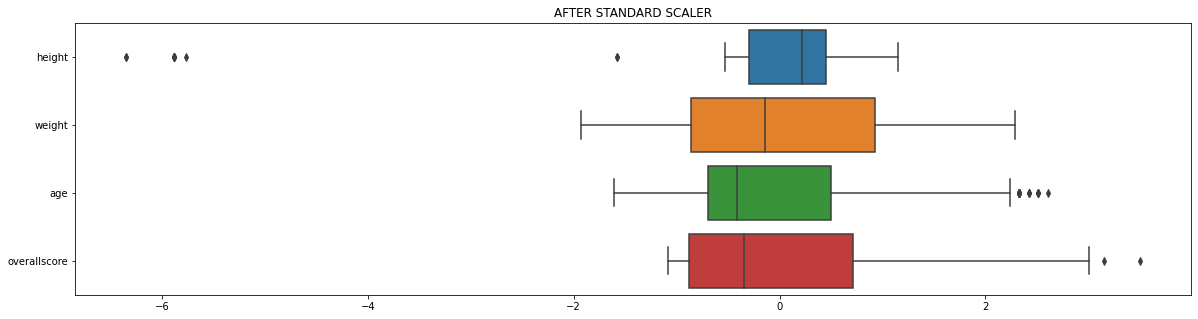

In [712]:
from sklearn.preprocessing import StandardScaler

numerical = ["height","weight", "age", "overallscore"]

#initialize the scaler
ss = StandardScaler()

#Fit the data using the scaler (scale the data)
Xstd = ss.fit_transform(xfit_orig[numerical].values)
print(Xstd.mean(), Xstd.std())

#update the dataframe with the standarized data
xfit_ss = xfit_orig.copy()
xfit_ss[numerical] = Xstd

#visualizing the dataset after the standarization
plt.figure(figsize=(20,5))
plt.title('AFTER STANDARD SCALER')
sns.boxplot(data=xfit_ss[ats], orient='h');
plt.show()

<font color='blue'>Now it looks good for the human eye! But still there's a big impact coming from the outliers, especially 'height'. This is because Standard Scaler is not able to perform well in presence of outliers. <br>Instead, let's see what happens when we use different feature scaling modules that are more fit in face of outliers:
<br><br>
    - <b>RobustScaler():</b> an scaler that uses the median and IQR, instead of the mean and standard deviation. Follows lineal transformation. 
    <br>- <b>PowerTransformer():</b> a transformer that allows us mapping the data to a normal distribution. Follows non-lineal transformation. 

### - RobustScaler()

In [713]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Numerical parameters
num_pipe_robust = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('scaler', RobustScaler(with_centering=True, with_scaling=True))])

# Categorical parameters
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False))])


# Merging both
preprocessor = ColumnTransformer(transformers=[('num_transf', num_pipe_robust, ats),
                                               ('cat_transf', cat_pipe, categorical)
                                               ])
# Applying to our dataframe
X = preprocessor.fit_transform(xfit_orig);

xfit_X_robust = pd.DataFrame(X)
xfit_X_robust.drop(10, axis=1, inplace=True)
xfit_X_robust.columns = xfit_std.columns
xfit_X_robust[ats].sample(5, random_state=42)

,height,weight,age,overallscore
9,0.473684,0.625287,0.000000,0.928753
42,0.473684,0.666667,-0.307692,-0.030534
33,-0.789474,0.832184,-0.307692,0.180662
312,0.157895,0.271264,1.153846,1.577608
370,-0.684211,-0.625287,2.153846,0.305344


<font color='blue'>
    
### - PowerTransformer()

In [715]:
#this tranformer can't manage negative values, so we move the data in "overallscore" beyond 0
xfit_orig.overallscore = xfit_orig.overallscore + 1 + abs(xfit_orig.overallscore.min())

# Numerical parameters
num_pipe_robust = Pipeline([('imputer', SimpleImputer(strategy='median')),
                     ('power_transf', PowerTransformer(method='box-cox'))])

# Categorical parameters
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False))])


# Merging both
preprocessor = ColumnTransformer(transformers=[('num_transf', num_pipe_robust, ats),
                                               ('cat_transf', cat_pipe, categorical)
                                               ])
#applying to our dataframe
X = preprocessor.fit_transform(xfit_orig);
xfit_X_trans = pd.DataFrame(X)
xfit_X_trans.drop(10, axis=1, inplace=True)
xfit_X_trans.columns = xfit_std.columns
xfit_X_trans[ats].sample(5, random_state=42)

,height,weight,age,overallscore
9,1.012399,0.981324,-0.223933,1.109359
42,1.012399,1.048983,-0.830885,-0.012568
33,-0.980214,1.315830,-0.830885,0.333201
312,0.430581,0.385787,1.099653,1.552294
370,-0.846076,-1.284723,1.697939,0.498597


<font color='blue'>Now that all the feature engineering methods went through, let's plot all the results and compare the performances:

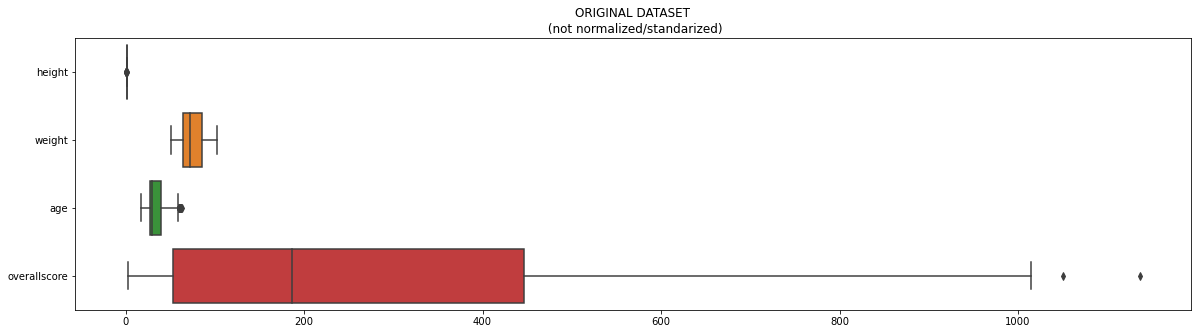

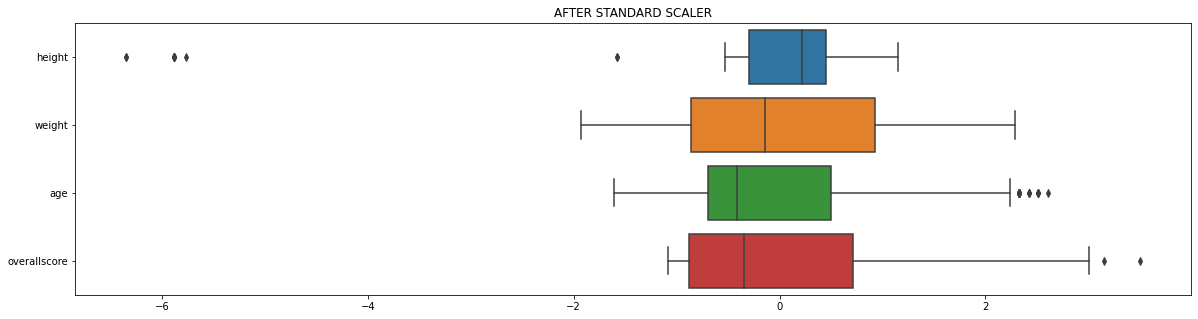

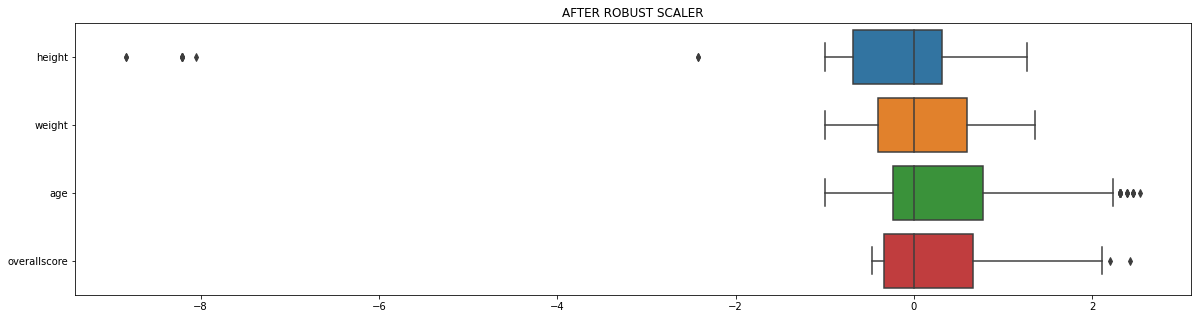

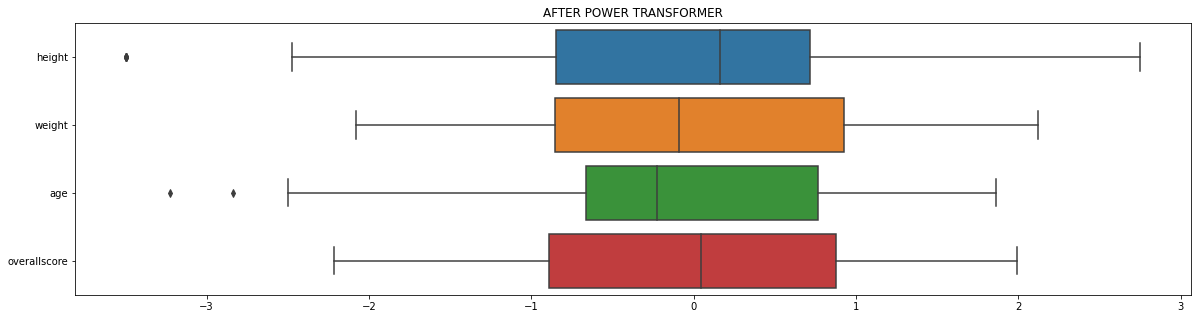

In [716]:
#numerical attributes all together
plt.figure(figsize=(20,5))
plt.title('ORIGINAL DATASET\n (not normalized/standarized)')
sns.boxplot(data=xfit_orig[ats], orient='h');
plt.show()

#plot after StandardScaler
plt.figure(figsize=(20,5))
plt.title('AFTER STANDARD SCALER')
sns.boxplot(data=xfit_ss[ats], orient='h');
plt.show()

#plot after RobustScaler
plt.figure(figsize=(20,5))
plt.title('AFTER ROBUST SCALER')
sns.boxplot(data=xfit_X_robust[ats], orient='h');
plt.show()

#plot after PowerTransformer
plt.figure(figsize=(20,5))
plt.title('AFTER POWER TRANSFORMER')
sns.boxplot(data=xfit_X_trans[ats], orient='h');
plt.show()

<font color='blue'>Finally we can see how all the methods perform in presence of outliers, and while all the scalers help with standarizing pretty well, the only one that's really able to normalize it including the outliers is the <b>Power Transformer.</b>